# chapter2

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = [2,2,4,6,4,5,2,3,1,2,0,4,3,3,3,3,4,2,7,2,4,3,3,3,4,3,7,5,3,1,7,6,4,6,5,2,4,7,2,2,6,2,4,5,4,5,1,3,2,3]

In [3]:
len(data)

50

In [4]:
data = pd.Series(data)

In [5]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [6]:
data.value_counts(sort=False)

0     1
1     3
2    11
3    12
4    10
5     5
6     4
7     4
dtype: int64

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

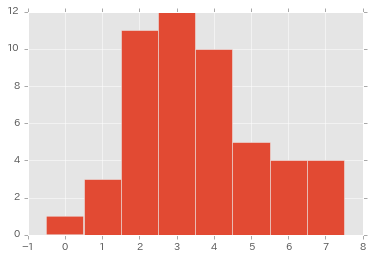

In [7]:
plt.hist(data, bins=np.arange(-0.5, 8.5, 1.0))

In [8]:
data.var()

2.986122448979593

In [9]:
data.std()

1.7280400600042793

In [10]:
data.mean()

3.5600000000000001

In [11]:
from scipy.stats import poisson
y = np.arange(0,10)
prob = pd.Series(poisson.pmf(y, data.mean()), index=y)
prob

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64

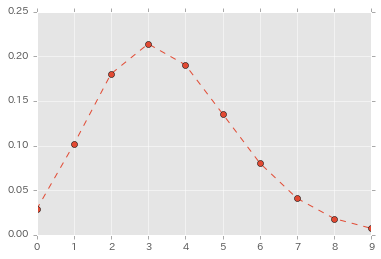

In [12]:
plt.plot(prob, 'o--')

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

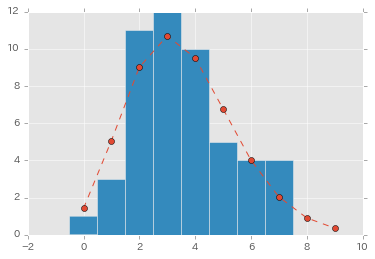

In [14]:
plt.plot(prob.mul(50), 'o--')
plt.hist(data, bins = np.arange(-0.5, 8.5, 1.0))

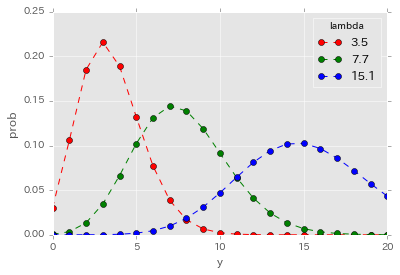

In [15]:
y = np.arange(0, 21)
lambdas = [3.5, 7.7, 15.1]
styles = ['ro--', 'go--', 'bo--']
labels = ['3.5', '7.7', '15.1']
for i in range(3):
    prob = pd.Series(poisson.pmf(y, lambdas[i]), index=y)
    plt.plot(prob, styles[i], label=labels[i])
plt.legend(loc='best', title='lambda')
plt.xlabel('y')
plt.ylabel('prob')

/Users/yuki.ohnishi/.pyenv/versions/keyword/lib/python3.4/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


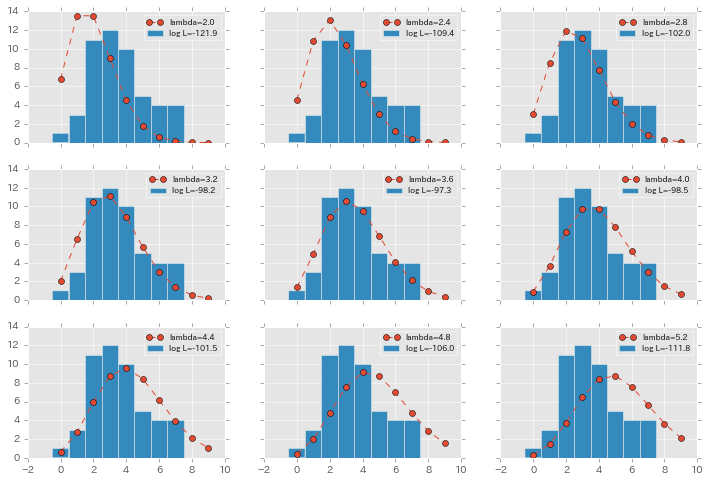

In [15]:
y = np.arange(0, 10)
lambdas = np.arange(2.0, 5.6, 0.4)

# Figure
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 8))
for i in range(9):
    mu = lambdas[i]
    prob = pd.Series(poisson.pmf(y, mu), index=y)
    logL = sum(poisson.logpmf(data, mu))
    row, col = i / 3, i % 3
    ax = axes[row, col]
    ax.plot(prob.mul(50), 'o--', label='lambda=%.1f' % mu)
    ax.hist(data, bins=np.arange(-0.5, 8.5, 1.0), label='log L=%.1f' % logL)
    ax.legend(loc='best', fontsize=8)

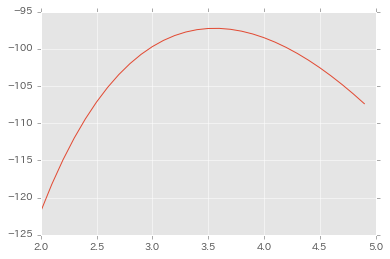

In [16]:
from subprocess import check_output

lambdas = pd.Series(np.arange(2, 5, 0.1))
logL = lambda m: sum(poisson.logpmf(data, m))
plt.plot(lambdas, lambdas.apply(logL), '-')

(array([   2.,    5.,   12.,   17.,   34.,   86.,  194.,  348.,  295.,
         438.,  423.,  442.,  354.,  152.,   91.,   70.,   24.,    6.,
           4.,    3.]),
 array([ 2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
         3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5]),
 <a list of 20 Patch objects>)

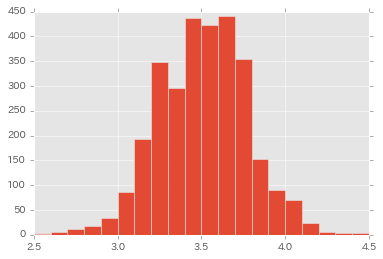

In [17]:
res = []
for i in range(3000):
    res.append(np.random.poisson(3.5, 50).mean())
plt.hist(res, bins=20)

# # LaTeX
# from matplotlib import rc
# rc('text', usetex=True)
# plt.xlabel(u'\hat{\lambda}')